# Data Wragling (Step By Step Commands)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Reading the data set from the URL and adding the related headers.

In [2]:
filename="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv",names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Handling the missing data 

In [5]:
df.replace('?',np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
missing_data=df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Count Missing Values in Each Column

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Calculate the average of the column 

In [8]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("average of bore", avg_bore)

average of bore 3.3297512437810957


Replace NaN by mean value

In [9]:
df['bore'].replace(np.nan, avg_bore,inplace=True)

In [10]:
df['bore'].value_counts() #To see which values are present in a particular column, we can use the ".value_counts()" method:

3.62                  23
3.19                  20
3.15                  15
3.03                  12
2.97                  12
3.46                   9
3.43                   8
3.31                   8
3.78                   8
3.27                   7
2.91                   7
3.54                   6
3.05                   6
3.58                   6
3.39                   6
3.01                   5
3.70                   5
3.3297512437810957     4
3.35                   4
3.74                   3
3.17                   3
3.59                   3
3.50                   2
3.13                   2
3.80                   2
3.63                   2
3.47                   2
3.24                   2
3.94                   2
3.33                   2
3.34                   1
3.08                   1
2.99                   1
3.61                   1
3.60                   1
2.68                   1
2.54                   1
3.76                   1
2.92                   1
Name: bore, dtype: int64

In [11]:
#We can also use the ".idxmax()" method to calculate for us the most common type automatically:

df['num-of-doors'].value_counts().idxmax()

'four'

In [12]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [23]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27.0,13495.0,11.190476
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27.0,16500.0,11.190476
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26.0,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30.0,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22.0,17450.0,13.055556


In [24]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,13495.0,11.190476
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,16500.0,11.190476
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,10.681818,17450.0,13.055556


In [26]:
# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':"highway-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,13495.0,11.190476
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,16500.0,11.190476
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,10.681818,17450.0,13.055556


In [19]:
# Convert data types to proper format¶
df[['bore','stroke']]=df[['bore','stroke']].astype('float')
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg          float64
price                 object
dtype: object

In [20]:
df[['price']]=df[['price']].astype('float')
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg          float64
price                float64
dtype: object

# Data Normaliztion

In [28]:
# Write your code below and press Shift+Enter to execute 
df['height']=df['height']/df['height'].max()
df['width']=df['width']/df['width'].max()
df[['length','width','height']].head()

,length,width,height
0,168.8,0.890278,0.816054
1,168.8,0.890278,0.816054
2,171.2,0.909722,0.876254
3,176.6,0.919444,0.908027
4,176.6,0.922222,0.908027


# Binning
Why binning?
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

Example: In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?
We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

In [33]:
# convert the horse-power into correct format

df["horsepower"]=df["horsepower"].astype(float, copy=True)
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg          float64
price                float64
city-L/100km         float64
dtype: object

C:\Users\Neha Agarwal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Neha Agarwal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'horsepower bins')

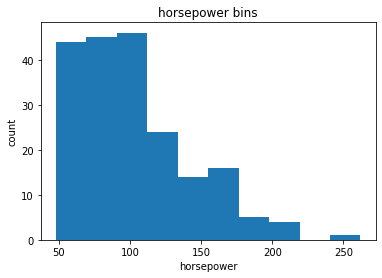

In [36]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

In [37]:
bins=np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)

In [38]:
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [39]:
group_names=["Low","Medium","High"] #group names

In [41]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(10) # function "cut" the determine what each value of "df['horsepower']" belongs to.

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


In [42]:
df["horsepower-binned"].value_counts()

Low       151
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

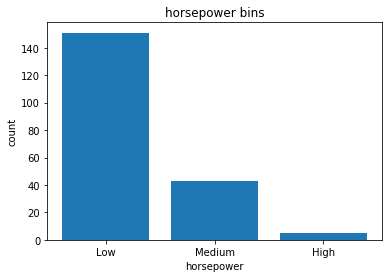

In [46]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.bar(group_names,df["horsepower-binned"].value_counts())
#pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [48]:
## Bins visualization
# Normally, a histogram is used to visualize the distribution of bins we created above.

Text(0.5, 1.0, 'horsepower bins')

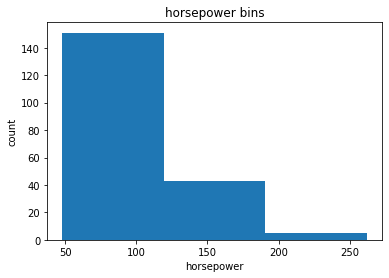

In [50]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#a = (0,1,2)
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [51]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [52]:
dummy_variable1=pd.get_dummies(df["fuel-type"])
dummy_variable1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [56]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [57]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,diesel,gas
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,5000,21,8.703704,13495.0,11.190476,Low,0,1,0,1
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,5000,21,8.703704,16500.0,11.190476,Low,0,1,0,1
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,5000,19,9.038462,16500.0,12.368421,Medium,0,1,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,5500,24,7.833333,13950.0,9.791667,Low,0,1,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,5500,18,10.681818,17450.0,13.055556,Low,0,1,0,1


In [58]:
dummy_variable2=pd.get_dummies(df['aspiration'])
dummy_variable2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [60]:
dummy_variable2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [61]:
df=pd.concat([df,dummy_variable2],axis=1)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,diesel,gas,aspiration-std,aspiration-turbo
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,8.703704,13495.0,11.190476,Low,0,1,0,1,1,0
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,8.703704,16500.0,11.190476,Low,0,1,0,1,1,0
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,9.038462,16500.0,12.368421,Medium,0,1,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,7.833333,13950.0,9.791667,Low,0,1,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,10.681818,17450.0,13.055556,Low,0,1,0,1,1,0
5,2,NaN,audi,std,two,sedan,fwd,front,99.8,177.3,...,9.400000,15250.0,12.368421,Low,0,1,0,1,1,0
6,1,158,audi,std,four,sedan,fwd,front,105.8,192.7,...,9.400000,17710.0,12.368421,Low,0,1,0,1,1,0
7,1,NaN,audi,std,four,wagon,fwd,front,105.8,192.7,...,9.400000,18920.0,12.368421,Low,0,1,0,1,1,0
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,192.7,...,11.750000,23875.0,13.823529,Medium,0,1,0,1,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,176.8,...,8.103448,16430.0,10.217391,Low,0,1,0,1,1,0


In [62]:
df.drop('aspiration',inplace=True,axis=1)

In [63]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,diesel,gas,aspiration-std,aspiration-turbo
0,3,NaN,alfa-romero,two,convertible,rwd,front,88.6,168.8,0.890278,...,8.703704,13495.0,11.190476,Low,0,1,0,1,1,0
1,3,NaN,alfa-romero,two,convertible,rwd,front,88.6,168.8,0.890278,...,8.703704,16500.0,11.190476,Low,0,1,0,1,1,0
2,1,NaN,alfa-romero,two,hatchback,rwd,front,94.5,171.2,0.909722,...,9.038462,16500.0,12.368421,Medium,0,1,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,0.919444,...,7.833333,13950.0,9.791667,Low,0,1,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,0.922222,...,10.681818,17450.0,13.055556,Low,0,1,0,1,1,0


In [65]:
df.to_csv('Practice-Data Wragling')